In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import RocCurveDisplay
from sklearn import preprocessing
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report


In [226]:
ml_df = pd.read_csv(
    "../Dataset/dataset_filled_missing.csv")
ml_df.drop(["Unnamed: 0"], axis=1, inplace=True)
ml_df['Id'] = ['condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'control', 'control',
               'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control']
ml_df


,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,5days_sleep_time_activity,5days_day_time_activity,Id
0,2,37,2,2,2,8,1,2,19,10693.6,228824.0,condition
1,2,42,1,2,2,8,2,2,24,48771.2,239278.2,condition
2,1,47,2,2,2,8,2,2,24,43211.0,317726.0,condition
3,2,27,2,2,2,13,1,1,20,56892.4,194298.2,condition
4,2,52,2,2,2,13,2,2,26,31303.8,200302.2,condition
5,1,37,2,2,2,8,1,2,18,26634.2,240767.8,condition
6,1,22,1,2,2,13,2,1,24,61643.6,335598.2,condition
7,2,27,2,2,2,13,1,2,20,34374.2,284320.6,condition
8,2,47,1,2,2,8,1,2,26,42992.0,203120.0,condition
9,2,47,2,2,2,8,1,2,28,25811.0,482765.0,condition


In [227]:
import math
from matplotlib.colors import ListedColormap

In [228]:
x = []
y = []
count = 0
count_g = 0
count_o = 0

for i in range(len(ml_df["Id"])):

    if ml_df["Id"][i] == "condition":
        x.append([1])
        y.append([ml_df["5days_sleep_time_activity"][i],
                  ml_df["5days_day_time_activity"][i], ml_df["age"][i], ml_df["gender"][i], ml_df["afftype"][i],
                  ml_df["melanch"][i], ml_df["inpatient"][i], ml_df["edu"][i], ml_df["work"][i], ml_df["madrs1"][i], ml_df["marriage"][i]])

    elif ml_df["Id"][i] == "control":
        x.append([0])
        y.append([ml_df["5days_sleep_time_activity"][i],
                  ml_df["5days_day_time_activity"][i], ml_df["age"][i], ml_df["gender"][i], ml_df["afftype"][i],
                  ml_df["melanch"][i], ml_df["inpatient"][i], ml_df["edu"][i], ml_df["work"][i], ml_df["madrs1"][i], ml_df["marriage"][i]])


print(f'Select: {len(y)} set')
y = np.array(y)
x = np.array(x)

print(y)
print(x)


Select: 55 set
[[1.069360e+04 2.288240e+05 3.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 1.900000e+01
  1.000000e+00]
 [4.877120e+04 2.392782e+05 4.200000e+01 2.000000e+00 1.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01
  2.000000e+00]
 [4.321100e+04 3.177260e+05 4.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01
  2.000000e+00]
 [5.689240e+04 1.942982e+05 2.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 1.300000e+01 1.000000e+00 2.000000e+01
  1.000000e+00]
 [3.130380e+04 2.003022e+05 5.200000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 1.300000e+01 2.000000e+00 2.600000e+01
  2.000000e+00]
 [2.663420e+04 2.407678e+05 3.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 1.800000e+01
  1.000000e+00]
 [6.164360e+04 3.355982e+05 2.200000e+01 1.000000e+00 1.000000e+00
  2.000000e+00 2.0

In [229]:
# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state)


In [230]:
print(x_train)
print(y_train)

[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
[[5.014700e+04 1.534946e+05 4.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01
  1.000000e+00]
 [1.032050e+05 4.311018e+05 2.700000e+01 1.000000e+00 0.000000e+00
  2.000000e+00 0.000000e+00 1.300000e+01 1.000000e+00 9.000000e+00
  2.000000e+00]
 [2.958120e+04 2.358314e+05 3.200000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 1.000000e+00 1.800000e+01 2.000000e+00 2.900000e+01
  2.000000e+00]
 [1.914980e+04 1.691192e+05 3.200000e+01 2.000000e+00 0.000000e+00
  2.000000e+00 0.000000e+00 1.800000e+01 1.000000e+00 4.000000e+00
  1.000000e+00]
 [8.464720e+04 3.317996e+05 5.200000e+01 2.000000e+00 0.000000e+00
  2.000000e+00 0.000000e+00 8.000000e+00 1.000000e+00 4.000000e+00
  2.000000e+00]
 [6.471040e+04 3.732576e+05 4

In [231]:
def classifier_modeling():
    model = Sequential()
    model.add(Dense(70, input_shape=(11,), activation='relu'))
    model.add(Dense(65, activation='relu'))
    model.add(Dense(125, activation='relu'))
    # model.add(Dense(140, activation='relu'))
    # model.add(Dense(70, activation='relu'))
    # model.add(Dense(20, activation='elu'))
    # model.add(Dense(130, activation='softsign'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


In [232]:
# #testing model
# model = Sequential()
# model.add(Dense(115, input_shape=(11,), activation='sigmoid'))
# model.add(Dense(55, activation='sigmoid'))
# model.add(Dense(85, activation='sigmoid'))
# model.add(Dense(2, activation='selu'))
# model.compile(loss='binary_crossentropy',
#               optimizer='Adamax', metrics=['accuracy'])

# le = preprocessing.LabelEncoder()
# le.fit(x_train)
# x_train = le.transform(x_train)
# x_train = keras.utils.to_categorical(x_train)

# model.fit(y_train, x_train, validation_split=0.2, epochs=50, batch_size=2)


Automatically created module for IPython interactive environment
Epoch 1/150


C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 1s 678ms/step - loss: 5627.9341 - accuracy: 0.3929 - val_loss: 2194.2593 - val_accuracy: 0.4286
Epoch 2/150
1/1 [==============================] - 0s 29ms/step - loss: 1166.1293 - accuracy: 0.5357 - val_loss: 5266.3271 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 [==============================] - 0s 32ms/step - loss: 3291.8254 - accuracy: 0.5714 - val_loss: 6689.0659 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 [==============================] - 0s 28ms/step - loss: 4111.8369 - accuracy: 0.6071 - val_loss: 6103.1162 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 37ms/step - loss: 3416.3931 - accuracy: 0.6071 - val_loss: 4335.7422 - val_accuracy: 0.0000e+00
Epoch 6/150
1/1 [==============================] - 0s 33ms/step - loss: 1877.8549 - accuracy: 0.6429 - val_loss: 3641.1199 - val_accuracy: 0.0000e+00
Epoch 7/150
1/1 [==============================] - 0s 37ms/step - loss: 1109.5684 - accuracy: 0.6429 - val_loss: 28

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 1s 860ms/step - loss: 1480.0609 - accuracy: 0.4286 - val_loss: 8379.0654 - val_accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 0s 28ms/step - loss: 2336.2703 - accuracy: 0.6786 - val_loss: 7493.4185 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 [==============================] - 0s 34ms/step - loss: 2248.4312 - accuracy: 0.6786 - val_loss: 4783.6406 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 [==============================] - 0s 41ms/step - loss: 1655.1562 - accuracy: 0.6786 - val_loss: 1660.6652 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 51ms/step - loss: 574.3160 - accuracy: 0.5714 - val_loss: 1190.8035 - val_accuracy: 0.8571
Epoch 6/150
1/1 [==============================] - 0s 41ms/step - loss: 1360.6368 - accuracy: 0.3929 - val_loss: 620.6895 - val_accuracy: 1.0000
Epoch 7/150
1/1 [==============================] - 0s 53ms/step - loss: 1720.5441 - accuracy: 0.3929 - val_loss: 255.7654

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 1s 695ms/step - loss: 5194.4326 - accuracy: 0.3214 - val_loss: 319.3696 - val_accuracy: 1.0000
Epoch 2/150
1/1 [==============================] - 0s 31ms/step - loss: 1319.2396 - accuracy: 0.3214 - val_loss: 6059.6685 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 [==============================] - 0s 38ms/step - loss: 1896.5682 - accuracy: 0.6429 - val_loss: 8139.7319 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 [==============================] - 0s 43ms/step - loss: 2610.0366 - accuracy: 0.6786 - val_loss: 7605.5659 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 43ms/step - loss: 2435.0129 - accuracy: 0.6786 - val_loss: 5508.5479 - val_accuracy: 0.0000e+00
Epoch 6/150
1/1 [==============================] - 0s 39ms/step - loss: 2001.5898 - accuracy: 0.6786 - val_loss: 3686.7458 - val_accuracy: 0.0000e+00
Epoch 7/150
1/1 [==============================] - 0s 40ms/step - loss: 1519.6193 - accuracy: 0.6429 - val_loss: 159

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 1s 690ms/step - loss: 1418.8115 - accuracy: 0.6786 - val_loss: 65.0894 - val_accuracy: 1.0000
Epoch 2/150
1/1 [==============================] - 0s 37ms/step - loss: 1227.8436 - accuracy: 0.3214 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/150
1/1 [==============================] - 0s 40ms/step - loss: 1249.0953 - accuracy: 0.3214 - val_loss: 916.9440 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 [==============================] - 0s 42ms/step - loss: 289.1361 - accuracy: 0.6786 - val_loss: 3127.8738 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 43ms/step - loss: 986.0937 - accuracy: 0.6786 - val_loss: 2753.5813 - val_accuracy: 0.0000e+00
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 957.5157 - accuracy: 0.6786 - val_loss: 1098.2748 - val_accuracy: 0.0000e+00
Epoch 7/150
1/1 [==============================] - 0s 37ms/step - loss: 334.4109 - accuracy: 0.6786 - val_loss: 609.6347 - v

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 1s 657ms/step - loss: 7847.1108 - accuracy: 0.5357 - val_loss: 5641.1465 - val_accuracy: 1.0000
Epoch 2/150
1/1 [==============================] - 0s 28ms/step - loss: 5465.1099 - accuracy: 0.5357 - val_loss: 2284.5740 - val_accuracy: 1.0000
Epoch 3/150
1/1 [==============================] - 0s 36ms/step - loss: 3104.4866 - accuracy: 0.5357 - val_loss: 17.9962 - val_accuracy: 1.0000
Epoch 4/150
1/1 [==============================] - 0s 39ms/step - loss: 1309.2899 - accuracy: 0.5357 - val_loss: 784.3503 - val_accuracy: 1.0000
Epoch 5/150
1/1 [==============================] - 0s 44ms/step - loss: 1053.6453 - accuracy: 0.5714 - val_loss: 2439.5186 - val_accuracy: 0.7500
Epoch 6/150
1/1 [==============================] - 0s 43ms/step - loss: 1779.2517 - accuracy: 0.5000 - val_loss: 3268.7495 - val_accuracy: 0.2500
Epoch 7/150
1/1 [==============================] - 0s 36ms/step - loss: 1883.6013 - accuracy: 0.5714 - val_loss: 3410.7830 - val_accuracy:

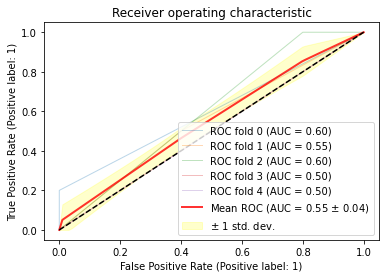

In [233]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
import pickle
import matplotlib.pyplot as plt
print(__doc__)


# Add noisy features
random_state = np.random.RandomState(0)

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state)

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)

history = []

tprs = []
aucs = []

x_train_best = []
y_train_best = []

mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

x_train = np.argmax(x_train, axis=1) 

for i, (train, val) in enumerate(cv.split(y_train, x_train)):

    X_train, X_val = y[train], y[val]
    y_train, y_val = x[train], x[val]

    le = preprocessing.LabelEncoder()
    le.fit(y_train)
    y_train = le.transform(y_train)
    y_train = keras.utils.to_categorical(y_train)

    
    classifier = classifier_modeling()

    # Fit model
    classifier.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=40)

    # Save model
    #with open('model\\ann_wofill', 'wb') as f:
    #    pickle.dump(classifier, f)

    # Predict
    predict = classifier.predict(X_val)
    predict = np.argmax(predict, axis=1)

    viz = RocCurveDisplay.from_predictions(y_val, predict, name='ROC fold {}'.format(i),
                           alpha=0.3, lw=1, ax=ax)                     
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    x_train_best.append(x_train)
    y_train_best.append(y_train)


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="r",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="yellow",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig(
   'graph\\ann_wofill_graph.jpg')
plt.show()




In [234]:
#findind best x_train y_train

index_max_auc = aucs.index(max(aucs))
index_max_auc


0

In [235]:
# print(y_test)
# print(x_test)


In [236]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


classifier = classifier_modeling()

# Fit model
classifier.fit(x_train_best[index_max_auc], y_train_best[index_max_auc], validation_split=0.2,
               epochs=150, batch_size=40)
# Report
predict = classifier.predict(y_test)
predict = np.argmax(predict, axis=1)
# x_test = x_test[:,0]

print(predict)
print(x_test)

print(classification_report(x_test, predict))

conf = confusion_matrix(x_test, predict)
sensitivity = conf[1, 1]/(conf[0, 1] + conf[1, 1])
specificity = conf[0, 0]/(conf[0, 0] + conf[1, 0])
acc = accuracy_score(predict, x_test)

print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)
print('Accuracy : ', acc)
print('Precision : %.3f' % precision_score(predict, x_test))
print('F1 Score : %.3f' % f1_score(predict, x_test))
print('                         non-depressed        depressed   ')
print('Actual non=depressed     %6d' %
      conf[0, 0] + "            %5d" % conf[0, 1])
print('Actual depressed         %6d' %
      conf[1, 0] + "            %5d" % conf[1, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        ax.text(x=j, y=i, s=conf[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix NN(relu, selu)', fontsize=18) #change by your output's activation function
plt.savefig(
   'matrix\\ann_filled_matrix.jpg')
plt.show()


Epoch 1/150


ValueError: in user code:

    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_108" (type Sequential).
    
    Input 0 of layer "dense_532" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=True
      • mask=None
